In [83]:

import pandas as pd
import numpy as np
import math
from sklearn import model_selection
import platform
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

#연습경기 성정
pre_season = pd.read_csv('../data/Pre_Season_Batter2.csv')

#정규시즌 성적을 포함하여 개인정보
regular_season = pd.read_csv('../data/Regular_Season_Batter2.csv')

day_by_day_of = pd.read_csv('../data/Regular_Season_Batter_Day_by_Day_b42.csv')

if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                           ).get_name()
    rc('font', family=font_name)


matplotlib.rcParams['axes.unicode_minus'] = False


# 타자들의 일자 별 정규시즌 성적
regular_season_batter = pd.read_csv('../data/Regular_Season_Batter_Day_by_Day_b42.csv')
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
matplotlib.rcParams['axes.unicode_minus'] = False

In [84]:
regular_season=regular_season.drop(columns=['Unnamed: 0'],axis=1)


pre_season=pre_season.drop(columns=['Unnamed: 0'],axis=1)

day_by_day_of=day_by_day_of.drop(columns=['Unnamed: 0'],axis=1)


In [85]:
regular_season.isnull().sum(axis=0)

batter_id                  0
batter_name                0
year                       0
team                       0
avg                       26
G                          0
AB                         0
R                          0
H                          0
2B                         0
3B                         0
HR                         0
TB                         0
RBI                        0
SB                         0
CS                         0
BB                         0
HBP                        0
SO                         0
GDP                        0
SLG                       26
OBP                       24
E                          0
height/weight            802
year_born                  0
position                 802
career                     0
starting_salary         1067
OPS                       26
weight                   802
height                   802
weight_per_height        802
hit_way                  802
pos                      802
country       

# 결측치 처리 및 데이터 오류 처리
## 수치형 데이터 변경

In [86]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_col = regular_season.select_dtypes(include=numerics).columns

In [87]:
num_col

Index(['batter_id', 'year', 'avg', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB',
       'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP', 'SLG', 'OBP', 'E', 'OPS',
       'weight', 'height', 'weight_per_height', 'starting_salary_list'],
      dtype='object')

In [88]:
#regular_season.isnull() == regular_season.isna() 같은거
regular_season.loc[regular_season.isnull().sum(axis=1)> 0, num_col].head()



,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SO,GDP,SLG,OBP,E,OPS,weight,height,weight_per_height,starting_salary_list
0,0,2018,0.339,50,183,27,62,9,0,8,...,25,3,0.519000,0.383000,9,0.902000,93.0,177.0,0.525424,NaN
12,138,2005,0.127,39,63,9,8,2,0,0,...,15,1,0.158730,0.256757,3,0.415487,NaN,NaN,NaN,NaN
13,138,2006,0.139,37,36,6,5,2,0,0,...,14,0,0.194444,0.326087,4,0.520531,NaN,NaN,NaN,NaN
14,138,2007,0.000,8,4,3,0,0,0,0,...,2,1,0.000000,0.000000,0,0.000000,NaN,NaN,NaN,NaN
15,138,2008,0.000,2,1,0,0,0,0,0,...,0,0,0.000000,0.000000,0,0.000000,NaN,NaN,NaN,NaN


In [89]:
regular_season[regular_season.select_dtypes(include=numerics).columns] = regular_season[regular_season.select_dtypes(include=numerics).columns].fillna(0)

In [90]:
regular_season

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,career,starting_salary,OPS,weight,height,weight_per_height,hit_way,pos,country,starting_salary_list
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902,93.0,177.0,0.525424,우타,내야수,foreign,0.0
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,광주대성초-광주동성중-광주동성고,10000만원,0.000,72.0,180.0,0.400000,좌타,내야수,korea,10000.0
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,광주대성초-광주동성중-광주동성고,10000만원,0.686,72.0,180.0,0.400000,좌타,내야수,korea,10000.0
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,광주대성초-광주동성중-광주동성고,10000만원,0.673,72.0,180.0,0.400000,좌타,내야수,korea,10000.0
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,광주대성초-광주동성중-광주동성고,10000만원,0.489,72.0,180.0,0.400000,좌타,내야수,korea,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,석천초-대헌중-공주고,4000만원,0.000,82.0,181.0,0.453039,양타,내야수,korea,4000.0
2450,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,석천초-대헌중-공주고,4000만원,0.000,82.0,181.0,0.453039,양타,내야수,korea,4000.0
2451,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,석천초-대헌중-공주고,4000만원,0.000,82.0,181.0,0.453039,양타,내야수,korea,4000.0
2452,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,석천초-대헌중-공주고,4000만원,0.761,82.0,181.0,0.453039,양타,내야수,korea,4000.0


In [91]:
regular_season_batter=regular_season_batter.drop(columns=['Unnamed: 0'],axis=1)
regular_season_batter

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,...,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year,month
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,...,0,0,0,1,0,1,0,0.333,2018,3
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,...,0,0,0,0,0,1,0,0.143,2018,3
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,...,0,0,0,0,0,0,0,0.167,2018,3
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,...,1,0,0,0,0,0,0,0.176,2018,3
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,...,3,0,0,0,0,0,1,0.190,2018,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112268,344,황진수,6.23,LG,-,0,0,0,0,0,...,0,0,0,1,0,0,0,0.158,2018,6
112269,344,황진수,6.26,넥센,0.000,1,0,0,0,0,...,0,0,0,0,0,1,0,0.150,2018,6
112270,344,황진수,6.27,넥센,0.500,2,1,1,1,0,...,0,0,0,0,0,1,0,0.182,2018,6
112271,344,황진수,6.28,넥센,-,0,0,0,0,0,...,0,0,0,0,0,0,0,0.182,2018,6


In [92]:
types = regular_season_batter.dtypes

In [93]:
type_list = []
for temp in types:
    type_list.append(temp)

In [94]:
result = set(type_list)

In [95]:
type_list = ['int64', 'float64']

regular_season_batter[regular_season_batter.select_dtypes(include=type_list).columns] = regular_season_batter[regular_season_batter.select_dtypes(include=type_list).columns].fillna(0)
#regular_season[regular_season.select_dtypes(include=numerics).columns] = regular_season[regular_season.select_dtypes(include=numerics).columns].fillna(0)

In [96]:
regular_season_batter.isnull().sum(axis=0)

batter_id        0
batter_name      0
date             0
opposing_team    0
avg1             0
AB               0
R                0
H                0
2B               0
3B               0
HR               0
RBI              0
SB               0
CS               0
BB               0
HBP              0
SO               0
GDP              0
avg2             0
year             0
month            0
dtype: int64

In [97]:
pre_season[pre_season.select_dtypes(include=numerics).columns] = pre_season[pre_season.select_dtypes(include=numerics).columns].fillna(0)

In [98]:
pre_season.isnull().sum(axis=0)

batter_id            0
batter_name          0
year                 0
team                 0
avg                  0
G                    0
AB                   0
R                    0
H                    0
2B                   0
3B                   0
HR                   0
TB                   0
RBI                  0
SB                   0
CS                   0
BB                   0
HBP                  0
SO                   0
GDP                  0
SLG                  0
OBP                  0
E                    0
height/weight        0
year_born            0
position             0
career               0
starting_salary    207
OPS                  0
new_idx              0
dtype: int64

## 비 수치형 데이터 변경

In [99]:
not_number = [x for x in regular_season.columns if x not in num_col]

In [100]:
not_number

['batter_name',
 'team',
 'height/weight',
 'year_born',
 'position',
 'career',
 'starting_salary',
 'hit_way',
 'pos',
 'country']

In [101]:
regular_season.loc[regular_season[not_number].isnull().sum(axis=1) > 0,not_number]

,batter_name,team,height/weight,year_born,position,career,starting_salary,hit_way,pos,country
0,가르시아,LG,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,우타,내야수,foreign
12,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,NaN,korea
13,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,NaN,korea
14,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,NaN,korea
15,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,NaN,korea
...,...,...,...,...,...,...,...,...,...,...
2427,황선일,LG,NaN,1987년 02월 17일,NaN,군산중앙초-군산중-군산상고-LG-상무-LG,NaN,NaN,NaN,korea
2428,황선일,LG,NaN,1987년 02월 17일,NaN,군산중앙초-군산중-군산상고-LG-상무-LG,NaN,NaN,NaN,korea
2429,황선일,한화,NaN,1987년 02월 17일,NaN,군산중앙초-군산중-군산상고-LG-상무-LG,NaN,NaN,NaN,korea
2445,황정립,KIA,NaN,1989년 12월 14일,NaN,학동초-경원중-배명고-고려대,NaN,NaN,NaN,korea


# 즉 loc는 조건문이랑 비슷하다 SQL문에 Select 비슷한 개념
## 내가 원하는 데이터만 추출하는 것이 최종 목표

In [102]:
drop_idx=regular_season.loc[
    #안타가 0개 이상이면서 장타율이 0인 사람
    ((regular_season['H'] > 0) & (regular_season['SLG' ] == 0)) |

    #안타가 0개 이상 혹은 볼넥이 0개 이상 혹은 맞은 볼이 0개 이상인 사람
    (((regular_season['H'] >0) |
    (regular_season['BB'] >0) |
    (regular_season['HBP'] > 0)) &
    (regular_season['OBP'] == 0))
].index

In [103]:
regular_season = regular_season.drop(index=drop_idx).reset_index(drop=True)
regular_season

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,career,starting_salary,OPS,weight,height,weight_per_height,hit_way,pos,country,starting_salary_list
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902,93.0,177.0,0.525424,우타,내야수,foreign,0.0
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,광주대성초-광주동성중-광주동성고,10000만원,0.000,72.0,180.0,0.400000,좌타,내야수,korea,10000.0
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,광주대성초-광주동성중-광주동성고,10000만원,0.686,72.0,180.0,0.400000,좌타,내야수,korea,10000.0
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,광주대성초-광주동성중-광주동성고,10000만원,0.673,72.0,180.0,0.400000,좌타,내야수,korea,10000.0
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,광주대성초-광주동성중-광주동성고,10000만원,0.489,72.0,180.0,0.400000,좌타,내야수,korea,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,석천초-대헌중-공주고,4000만원,0.000,82.0,181.0,0.453039,양타,내야수,korea,4000.0
2443,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,석천초-대헌중-공주고,4000만원,0.000,82.0,181.0,0.453039,양타,내야수,korea,4000.0
2444,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,석천초-대헌중-공주고,4000만원,0.000,82.0,181.0,0.453039,양타,내야수,korea,4000.0
2445,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,석천초-대헌중-공주고,4000만원,0.761,82.0,181.0,0.453039,양타,내야수,korea,4000.0


# 규정 타수 정의

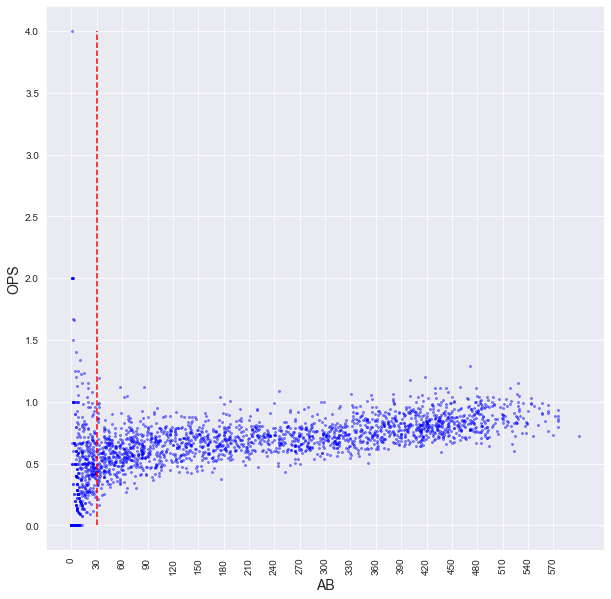

In [104]:
plt.figure(figsize=(10,10))
plt.plot('AB', 'OPS', data=regular_season, linestyle='none', marker='o', markersize=2, color='blue', alpha=0.4)
plt.xlabel('AB', fontsize=14)
plt.ylabel('OPS', fontsize=14)

#눈금 표시
plt.xticks(list(range(min(regular_season['AB']), max(regular_season['AB']), 30)), rotation=90)
#plt.vlines(30, ymin=(regular_season['OPS']),ymax=max(regular_season['OPS']), linestyles='dashed', colors='r')
plt.vlines(30, ymin=min(regular_season['OPS']),ymax=max(regular_season['OPS']), linestyles='dashed', colors='r')

#수평선 만들기
plt.show()

In [105]:
Q1 = regular_season['OPS'].quantile(0.25)
Q3 = regular_season['OPS'].quantile(0.75)

In [106]:
IQR =Q3 -Q1
IQR

0.2554267515923566

In [107]:
x=regular_season['OPS'].values
normalization = (x - x.mean())/x.std()
normalization = np.sort(normalization)

In [108]:
y = (1 / np.sqrt(2 * np.pi)) * np.exp(- normalization ** 2 / 2 )
y

array([2.14580478e-02, 2.14580478e-02, 2.14580478e-02, ...,
       9.91542366e-07, 9.91542366e-07, 1.75525626e-35])

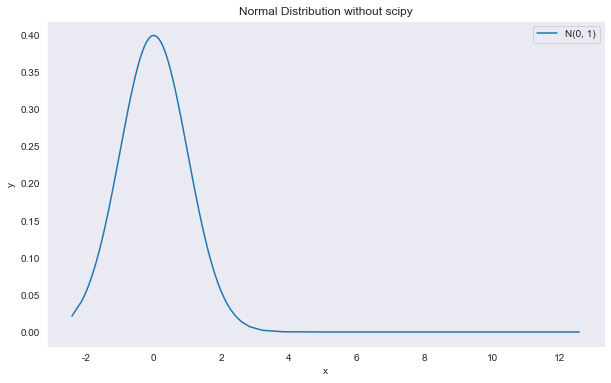

In [109]:
plt.figure(figsize=(10, 6))          # 플롯 사이즈 지정
plt.plot(normalization, y)
plt.xlabel("x")                      # x축 레이블 지정
plt.ylabel("y")                      # y축 레이블 지정
plt.grid()                           # 플롯에 격자 보이기
plt.title("Normal Distribution without scipy")     # 타이틀 표시
plt.legend(["N(0, 1)"])              # 범례 표시
plt.show()

In [110]:
regular_season.loc[(regular_season['OPS'] < (Q1 - 1.5 * IQR)) | (regular_season['OPS'] > (Q3 + 1.5 * IQR)), ['batter_name', 'AB', 'year', 'OPS']].sort_values(
    by=['AB'], axis=0, ascending=False
).head()

,batter_name,AB,year,OPS
2329,테임즈,472,2015,1.293656
97,강정호,418,2014,1.200156
1318,유재신,33,2018,1.192000
416,김원섭,25,2005,0.116923
1543,이여상,22,2013,0.090909


# 넘파이 예시 boolean 인덱싱

In [111]:
a = np.array([1,2,3])
b = a >= 2
a[b]

array([2, 3])

# 해당하는 값 불타입 추출 또는 index 추출하기

In [112]:
major_ticks = list(np.round(np.linspace(7.01, 7.31, 31),2))

#인덱스 추출 완료
july =day_by_day_of.loc[(day_by_day_of['date'] >= 7) & (day_by_day_of['date'] < 8),'date'].index

#bool 타입 추출
july_2 =(day_by_day_of['date'] >= 7) & (day_by_day_of['date'] < 8)

In [113]:
#day_by_day_of.iloc[july]
print(day_by_day_of[july_2].shape, day_by_day_of.iloc[july].shape)

(16124, 21) (16124, 21)


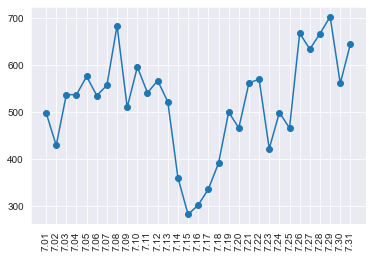

In [114]:
plt.plot(major_ticks, day_by_day_of['date'].iloc[july].value_counts().sort_index(), marker='o')
plt.xticks(major_ticks, rotation=90)
plt.show()

# 두산 팀타율 알아보기

In [115]:
dosan = regular_season.loc[regular_season['team'] == '두산', 'batter_id']
dosan=dosan.values
dosan = list(set(dosan))
dosan

[259,
 7,
 136,
 271,
 17,
 20,
 148,
 278,
 286,
 32,
 33,
 162,
 299,
 174,
 175,
 50,
 51,
 52,
 179,
 180,
 308,
 312,
 57,
 58,
 185,
 188,
 315,
 316,
 321,
 194,
 200,
 73,
 331,
 332,
 208,
 336,
 210,
 83,
 211,
 219,
 92,
 220,
 96,
 248,
 229,
 103,
 104,
 116,
 245,
 120,
 251,
 254]

In [116]:
#day_by_day_of.iloc[dosan]
day_dosan = day_by_day_of[day_by_day_of['batter_id'].isin(dosan)]
dosan_july=(day_dosan['date'] >= 7) & (day_dosan['date'] <8)

In [117]:
dosan_july

4747      False
4748      False
4749      False
4750      False
4751      False
          ...  
110223    False
110224    False
110225    False
110226    False
110227    False
Name: date, Length: 23769, dtype: bool

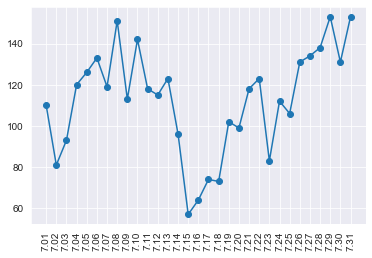

In [118]:
plt.plot(major_ticks, day_dosan['date'].loc[dosan_july].value_counts().sort_index(), marker='o')
plt.xticks(major_ticks, rotation=90)
plt.show()

In [119]:
dosan_s=day_dosan.loc[dosan_july].loc[day_by_day_of['AB'] >0]

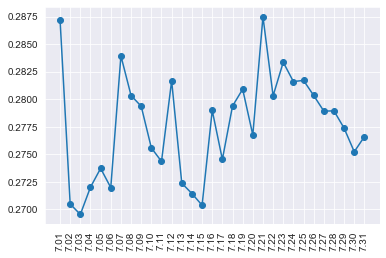

In [120]:
avgs = dosan_s.groupby('date')['avg2'].mean()

plt.plot(major_ticks, dosan_s.groupby('date')['avg2'].mean(), marker='o')
plt.xticks(major_ticks, rotation=90)
plt.show()

# 시간 반영 함수 정의와 변수 생성

In [121]:
# def lag_function(df, var_name, past):
#     # df = 시간변수를 생성할 데이터 프레임
#     # var_name = 시간변수 생성의 대상이 되는 변수 이름
#     # past = 몇 년 전의 성적을 생성할지 결정 (정수형)
#     df.reset_index(drop=True, inplace = True)
#
#     #시간변수 생성
#     df['lag'+str(past)+'_'+var_name] = np.nan;
#     df['lag'+str(past)+'_'+'AB'] = np.nan
#
#     for col in ['AB', var_name]:
#         for i in range(0,(max(df.index)+1)):
#             val = df.loc[(df['batter_name'] == df['batter_name'][i]) &
#                          (df['year'] == df['year'][i] - past), col]
#             # 과거 기록이 결측치가 아니라면 값을 넣기
#             if(len(val) != 0):
#                 df.loc[i, 'lag' + str(past) + '_' + col] = val.iloc[0]
#
#     #30타수 미만 결측치 처리
#     df.loc[df['lag' + str(past) + '_' + 'AB'] < 30,
#            'lag' + str(past) + '_' + var_name] = np.nan
#     df.drop('lag' + str(past) + '_' + 'AB', axis = 1, inplace = True)
#
#     return df


def lag_function(df, var_name, past):
    # df = 시간 변수를 생성할 데이터 프리임
    # var_name : 시간변수 생성의 대상이 되는 변수 이름
    # past = 몇 년  전의 성적을 생성할지 결정 (정수형)
    df.reset_index(drop=True, inplace=True)

    df['lag' + str(past) + '_' + var_name] = np.nan
    df['lag' + str(past) + '_' + 'AB'] = np.nan

    for col in ['AB', var_name]:
        for i in range(0, (max(df.index)+1)):
            val = df.loc[(df['batter_name'] == df['batter_name'][i]) &
                         (df['year'] == df['year'][i] - past), col]
            #과거 기록이 결측값이 아니라면 값을 넣기
            if len(val) != 0:
                df.loc[i, 'lag' + str(past) + '_' + col] = val.iloc[0]

    df.loc[df['lag' + str(past) + '_' + 'AB'] < 30, 'lag'+str(past)+'_'+var_name] = np.nan
    df.drop('lag'+str(past) + '_' + 'AB', axis=1, inplace=True)

    return df


# 깊은 복사 vs 얕은 복사 차이점

In [122]:
#얕은 복사 vs 깊은 복사
import pandas as pd
a = pd.DataFrame([['Kim', 25], ['Lee', 26],  ['Kang', 23]], columns = ['Name', 'Age'])
b = a #얕은 복사
#b = a.iloc[0,0] # 깊은 복사
#b.iloc[0, 0] = 'kim'
print(b)
print(f"a Id : {id(a)} b Id  : {id(b)}")


   Name  Age
0   Kim   25
1   Lee   26
2  Kang   23
a Id : 5057170304 b Id  : 5057170304


In [123]:
# 깊은 복사
c =b.copy()
b.iloc[0, 0] = 'Kim'
print(f"a Id : {id(a)} b Id  : {id(b)} c Id : {id(c)}")

a Id : 5057170304 b Id  : 5057170304 c Id : 5801205504


In [124]:
#파이썬은 기본적으로 얕은 복사
a = [1,2,3]
b = a #(얕은 복사)
#b = a[:] #깊은 복사
#b.append(4)
print(a)
print(b)
#print(f"a Id : {id(a)} b Id  : {id(b)}")
#
b.append(0)
a


[1, 2, 3]
[1, 2, 3]


[1, 2, 3, 0]

# 변수 선택 & 시간 범위

In [125]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32' ,'float64']

#내가 원하는 numerics 만 추출
numerics_cols=list(regular_season.select_dtypes(include=numerics).drop(
    ['batter_id', 'year', 'OPS', 'SLG'], axis=1
))

#특정 numerics 다 추출
#numerics_cols=list(regular_season.select_dtypes(include=numerics))

regular_season_temp = regular_season[numerics_cols + ['year', 'batter_name']].copy()
regular_season_temp = regular_season_temp.loc[regular_season_temp['AB'] >= 30]

#시간 변수 생성 함수를 통한 지표별 1년 전 성적 추출
for col in numerics_cols:
    regular_season_temp = lag_function(regular_season_temp, col, 1)


/var/folders/0z/p57jxqkj40j1xxl1j_pmfxmw0000gn/T/ipykernel_4353/1676734893.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


Text(0.5, 1.0, 'Diagonal Correlation HeatMap')

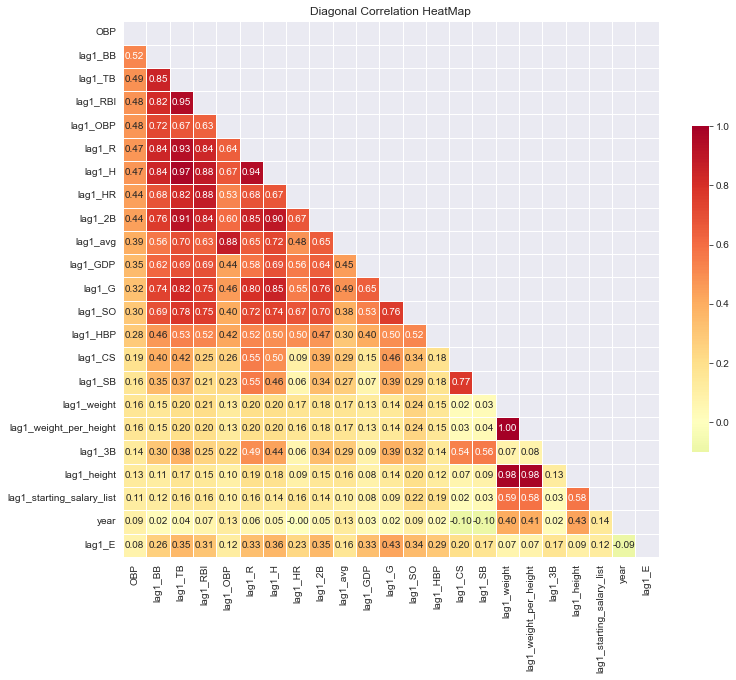

In [126]:
numerics_cols.remove('OBP')
regular_season_temp.drop(numerics_cols, axis = 1, inplace= True)

# 상관관계 도출
corr_matrix = regular_season_temp.corr()
corr_matrix = corr_matrix.sort_values(by = 'OBP', axis = 0, ascending=False)
corr_matrix = corr_matrix[corr_matrix.index]

# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(12, 12))
corr = regular_season_temp.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(corr_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask,
center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Diagonal Correlation HeatMap")

In [127]:
regular_season['SF'] = regular_season[['H', 'BB', 'HBP']].sum(axis=1) / regular_season['OBP'] - regular_season[['AB', 'BB', 'HBP']].sum(axis=1)

# def SFtest(x):
#     return round(x, 0)
#regular_season['SF'] = regular_season['SF'].apply(SFtest)

regular_season['SF'].fillna(0, inplace=True)
regular_season['SF'] = regular_season['SF'].apply(lambda x : round(x,0))


regular_season['SF_1'] = regular_season['SF'] / regular_season['AB']
regular_season_SF = regular_season[['batter_name', 'year', 'SF_1']]
regular_season_SF

,batter_name,year,SF_1
0,가르시아,2018,0.032787
1,강경학,2011,0.000000
2,강경학,2014,-0.000000
3,강경학,2015,0.009646
4,강경학,2016,0.009901
...,...,...,...
2442,황진수,2014,0.000000
2443,황진수,2015,0.000000
2444,황진수,2016,0.000000
2445,황진수,2017,0.008547


In [128]:
sum_hf_yr_OBP = day_by_day_of.loc[day_by_day_of['date'] <= 7.18].groupby(['batter_name', 'year'])['AB', 'H', 'BB', 'HBP'].sum().reset_index()

sum_hf_yr_OBP = sum_hf_yr_OBP.merge(regular_season_SF, how = 'left',
                                    on=['batter_name','year'])

sum_hf_yr_OBP['SF'] = (sum_hf_yr_OBP['SF_1']*sum_hf_yr_OBP['AB']).apply(
    lambda x: round(x, 0))
sum_hf_yr_OBP.drop('SF_1', axis = 1, inplace = True)

#선수별 전반기 OBP(출루율) 계산
sum_hf_yr_OBP['OBP'] = sum_hf_yr_OBP[['H', 'BB', 'HBP']].sum(axis = 1) / \
                       sum_hf_yr_OBP[['AB', 'BB', 'HBP','SF']].sum(axis = 1)
# OBP 결측치를 0으로 처리
sum_hf_yr_OBP['OBP'].fillna(0, inplace = True)

# 분석에 필요하지 않은 열 제거
sum_hf_yr_OBP = sum_hf_yr_OBP[['batter_name','year','AB','OBP']]
sum_hf_yr_OBP

/var/folders/0z/p57jxqkj40j1xxl1j_pmfxmw0000gn/T/ipykernel_4353/1142763871.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_hf_yr_OBP = day_by_day_of.loc[day_by_day_of['date'] <= 7.18].groupby(['batter_name', 'year'])['AB', 'H', 'BB', 'HBP'].sum().reset_index()


,batter_name,year,AB,OBP
0,가르시아,2018,85,0.418367
1,강경학,2011,1,0.000000
2,강경학,2014,0,1.000000
3,강경학,2015,156,0.342541
4,강경학,2016,81,0.222222
...,...,...,...,...
1381,황진수,2012,4,0.400000
1382,황진수,2013,0,0.000000
1383,황진수,2016,9,0.000000
1384,황진수,2017,71,0.316456


# 추가 변수 생성

In [129]:
regular_season['age'] = regular_season['year'] - regular_season['year_born'].apply(lambda x : int(x[:4]))

temp_df = regular_season.loc[regular_season['AB'] >= 30].groupby('age').agg({"OPS" : ['min', 'max']})
temp_df



OPS          
          min       max
age                    
18   0.433000  0.687000
19   0.165000  1.085000
20   0.273000  0.963000
21   0.358289  1.037000
22   0.429000  0.985012
23   0.215909  0.967000
24   0.246246  1.063226
25   0.375000  1.053000
26   0.254000  1.048000
27   0.341000  1.200156
28   0.298574  1.119000
29   0.310000  1.293656
30   0.375163  1.111849
31   0.413238  1.192000
32   0.395000  1.175000
33   0.485614  1.115000
34   0.472000  1.044000
35   0.483442  0.963000
36   0.440000  0.987000
37   0.429635  0.983553
38   0.510340  0.903000
39   0.441667  0.828000
40   0.651777  0.751050
41   0.433889  0.846405

In [130]:
temp_df = regular_season.loc[regular_season['AB'] >= 30].groupby('age').agg({"OPS" : ['min', 'max']}).reset_index()
temp_df

age       OPS          
             min       max
0   18  0.433000  0.687000
1   19  0.165000  1.085000
2   20  0.273000  0.963000
3   21  0.358289  1.037000
4   22  0.429000  0.985012
5   23  0.215909  0.967000
6   24  0.246246  1.063226
7   25  0.375000  1.053000
8   26  0.254000  1.048000
9   27  0.341000  1.200156
10  28  0.298574  1.119000
11  29  0.310000  1.293656
12  30  0.375163  1.111849
13  31  0.413238  1.192000
14  32  0.395000  1.175000
15  33  0.485614  1.115000
16  34  0.472000  1.044000
17  35  0.483442  0.963000
18  36  0.440000  0.987000
19  37  0.429635  0.983553
20  38  0.510340  0.903000
21  39  0.441667  0.828000
22  40  0.651777  0.751050
23  41  0.433889  0.846405

In [131]:
#temp_df.columns = temp_df.columns.droplevel()
temp_df.columns #

MultiIndex([('age',    ''),
            ('OPS', 'min'),
            ('OPS', 'max')],
           )

In [132]:
#temp_df.columns = temp_df.columns.droplevel()
temp_df.columns = ['age', 'mean_OBP', 'median_OBP']
temp_df.columns

Index(['age', 'mean_OBP', 'median_OBP'], dtype='object')

<Figure size 864x864 with 0 Axes>

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


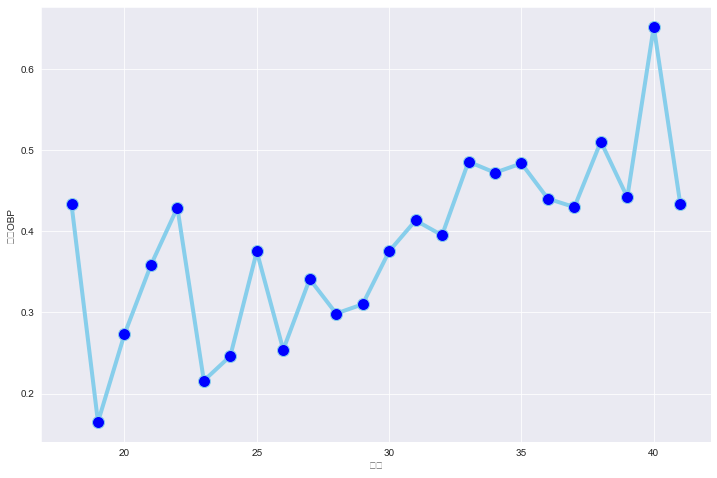

In [133]:
plt.figure(figsize=(12,12))

plt.figure(figsize=(12,8))
plt.plot('age', 'mean_OBP', data=temp_df, marker='o', markerfacecolor='blue',
         markersize=12, color='skyblue', linewidth=4)
plt.ylabel('평균OBP')
plt.xlabel('나이')
plt.show()

# Join에 대한 이해
### join Inner Join, Outer Join, Left Join, Right Join 종류

In [134]:
A = pd.DataFrame({'ID' : [1,2,3], '성명' : ['김', '조', '강']})
B= pd.DataFrame({'ID' : [2,3,4], '주소' : ['경기', '서울', '인천']})

#MS SQL
#select * FROM enrol a, subject b
#where a.subjectno = b.subjectno
#and 조건

#오라클
#select * FROM enrol natural join subejct
#select student.stu_no, stu_name, stu_dept, enr_grade from student join enrol on student.stu_no = enrol.stu_no ;

#두 개의 테이블 키 ID가 일치하는 데이터만 추출
inner_tab = pd.merge(A, B, on='ID') # default inner join

#좌 결합 : 왼쪽 테이블 (A) 키와 일치하는 데이터를 추출한다.
left_tab = pd.merge(A, B, on='ID', how='left')

#우 결합 : 오른쪽 테이블(B) 키와 일치하는 데이터를 추출한다.
right_tab = pd.merge(A, B, on='ID', how='right')

# 외부 결합 : 두 개의 테이블 키 와 그것에 관련된 데이터를 모두 추출한다.
outer_tab = pd.merge(A, B, on='ID', how='outer')
inner_tab

,ID,성명,주소
0,2,조,경기
1,3,강,서울


# 3년치 데이터 종합하기 (NAN 값이 너무 많다)

In [135]:
# 나이를 포함한 변수 선택
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(regular_season[['batter_name','year','age']],
                                    how = 'left', on=['batter_name','year'])


# 총 3년 전 성적까지 변수를 생성
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, "OBP", 1)
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, "OBP", 2)
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, "OBP", 3)
sum_hf_yr_OBP

,batter_name,year,AB,OBP,age,lag1_OBP,lag2_OBP,lag3_OBP
0,가르시아,2018,85,0.418367,33,NaN,NaN,NaN
1,강경학,2011,1,0.000000,19,NaN,NaN,NaN
2,강경학,2014,0,1.000000,22,NaN,NaN,NaN
3,강경학,2015,156,0.342541,23,NaN,NaN,NaN
4,강경학,2016,81,0.222222,24,0.342541,NaN,NaN
...,...,...,...,...,...,...,...,...
1381,황진수,2012,4,0.400000,23,NaN,NaN,NaN
1382,황진수,2013,0,0.000000,24,NaN,NaN,NaN
1383,황진수,2016,9,0.000000,27,NaN,NaN,NaN
1384,황진수,2017,71,0.316456,28,NaN,NaN,NaN


# 데이터 사후 처리

In [136]:
round(sum_hf_yr_OBP[['lag1_OBP','lag2_OBP','lag3_OBP']].isna().sum() / sum_hf_yr_OBP.shape[0], 2)

lag1_OBP    0.41
lag2_OBP    0.54
lag3_OBP    0.61
dtype: float64

In [137]:
#1. 선수별 OBP 평균
# SF = (H+BB+HBP) / OBP-(AB+BB+HBP)
# OBP = (H+BB+HBP) / (AB+BB+HBP+SF)
player_OBP_mean = regular_season.loc[regular_season['AB'] >= 30].groupby('batter_name')['AB','H','BB','HBP','SF'].sum().reset_index()
player_OBP_mean['mean_OBP'] = player_OBP_mean[['H', 'BB', 'HBP']].sum(axis=1) / player_OBP_mean[['AB','BB','HBP','SF']].sum(axis=1)

/var/folders/0z/p57jxqkj40j1xxl1j_pmfxmw0000gn/T/ipykernel_4353/986452492.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  player_OBP_mean = regular_season.loc[regular_season['AB'] >= 30].groupby('batter_name')['AB','H','BB','HBP','SF'].sum().reset_index()


In [138]:
#2. 시즌별 OBP 평균
season_OBP_mean = regular_season.loc[regular_season['AB'] >= 30].groupby('year')['AB','H','BB','HBP','SF'].sum().reset_index()

season_OBP_mean['mean_OBP'] = season_OBP_mean[['H', 'BB', 'HBP']].sum(axis=1) / season_OBP_mean[['AB','BB','HBP','SF']].sum(axis=1)
season_OBP_mean = season_OBP_mean[['year', 'mean_OBP']]

# player_OBP_mean(선수평균) 열 추가
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(player_OBP_mean[['batter_name', 'mean_OBP']], how ='left', on="batter_name")
sum_hf_yr_OBP = sum_hf_yr_OBP.loc[~sum_hf_yr_OBP['mean_OBP'].isna()].reset_index(drop=True)

/var/folders/0z/p57jxqkj40j1xxl1j_pmfxmw0000gn/T/ipykernel_4353/3280939519.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  season_OBP_mean = regular_season.loc[regular_season['AB'] >= 30].groupby('year')['AB','H','BB','HBP','SF'].sum().reset_index()


In [139]:
sum_hf_yr_OBP

,batter_name,year,AB,OBP,age,lag1_OBP,lag2_OBP,lag3_OBP,mean_OBP
0,가르시아,2018,85,0.418367,33,NaN,NaN,NaN,0.383495
1,강경학,2011,1,0.000000,19,NaN,NaN,NaN,0.337880
2,강경학,2014,0,1.000000,22,NaN,NaN,NaN,0.337880
3,강경학,2015,156,0.342541,23,NaN,NaN,NaN,0.337880
4,강경학,2016,81,0.222222,24,0.342541,NaN,NaN,0.337880
...,...,...,...,...,...,...,...,...,...
1347,황진수,2012,4,0.400000,23,NaN,NaN,NaN,0.358779
1348,황진수,2013,0,0.000000,24,NaN,NaN,NaN,0.358779
1349,황진수,2016,9,0.000000,27,NaN,NaN,NaN,0.358779
1350,황진수,2017,71,0.316456,28,NaN,NaN,NaN,0.358779


In [140]:
def lag_na_fill(data_set, var_name, past, season_var_mean_data):
    # data_Set: 이용할 데이터셋
    # var_name: 시간 변수를 만들 변수 이름
    # past: 몇 년 전 변수를 만들지 결정
    # season_var_name_mean_data season별로 var_name의 평균을 구한 데이터

    for i in data_set.index:
        if np.isnan(data_set["lag" + str(past) + "_" + var_name][i]):
            data_set.loc[i,["lag"+str(past)+"_"+var_name]] = \
                (
                data_set["mean" + "_" + var_name][i] + season_var_mean_data.loc[season_var_mean_data['year'] == (data_set['year'][i] - past), "mean_" + var_name].iloc[0]
                ) / 2
    return data_set

In [141]:
sum_hf_yr_OBP = lag_na_fill(sum_hf_yr_OBP, "OBP", 1, season_OBP_mean) # 1년 전 성적 대체
sum_hf_yr_OBP = lag_na_fill(sum_hf_yr_OBP, "OBP", 2, season_OBP_mean) # 2년 전 성적 대체
sum_hf_yr_OBP = lag_na_fill(sum_hf_yr_OBP, "OBP", 3, season_OBP_mean) # 3년 전 성적 대체
sum_hf_yr_OBP

,batter_name,year,AB,OBP,age,lag1_OBP,lag2_OBP,lag3_OBP,mean_OBP
0,가르시아,2018,85,0.418367,33,0.369982,0.375910,0.373119,0.383495
1,강경학,2011,1,0.000000,19,0.347434,0.348603,0.344259,0.337880
2,강경학,2014,0,1.000000,22,0.346682,0.337511,0.343131,0.337880
3,강경학,2015,156,0.342541,23,0.353425,0.346682,0.337511,0.337880
4,강경학,2016,81,0.222222,24,0.342541,0.353425,0.346682,0.337880
...,...,...,...,...,...,...,...,...,...
1347,황진수,2012,4,0.400000,23,0.353580,0.357883,0.359052,0.358779
1348,황진수,2013,0,0.000000,24,0.347960,0.353580,0.357883,0.358779
1349,황진수,2016,9,0.000000,27,0.360760,0.363874,0.357131,0.358779
1350,황진수,2017,71,0.316456,28,0.363552,0.360760,0.363874,0.358779


# SLF 데이터 전처리

/var/folders/0z/p57jxqkj40j1xxl1j_pmfxmw0000gn/T/ipykernel_4353/765537582.py:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


Text(0.5, 1.0, 'Diagonal Correlation HeatMap')

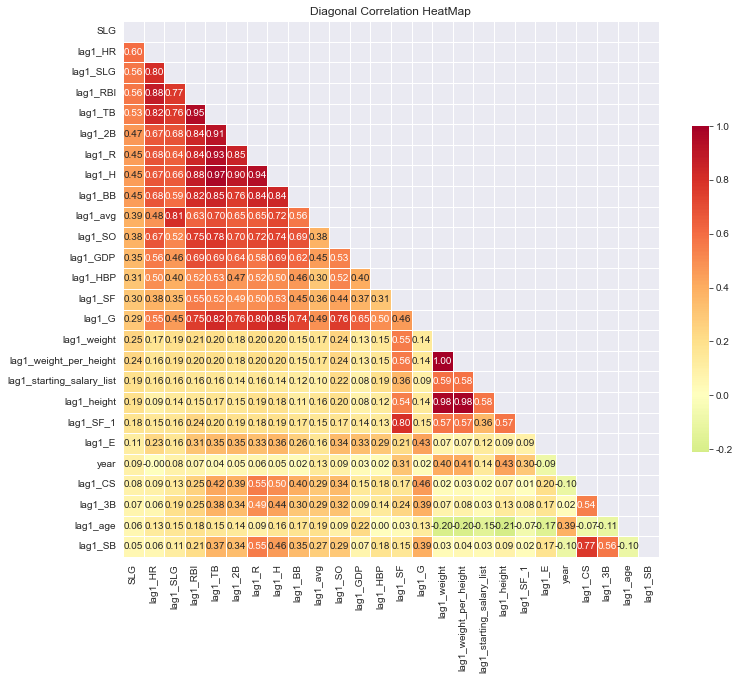

In [142]:
# 상관관계를 탐색할 변수 선택
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_cols = list(regular_season.select_dtypes(include=numerics).drop(
    ['batter_id','year','OPS','OBP'], axis =1).columns)
regular_season_temp = regular_season[numeric_cols + ['year', 'batter_name']].copy()
regular_season_temp = regular_season_temp.loc[regular_season_temp['AB']>=30]

# 시간변수 생성 함수를 통한 지표별 1년 전 성적 추출
for col in numeric_cols:
    regular_season_temp = lag_function(regular_season_temp, col, 1)

numeric_cols.remove('SLG')
regular_season_temp.drop(numeric_cols, axis = 1, inplace=True)

# 상관관계 도출
corr_matrix = regular_season_temp.corr()
corr_matrix = corr_matrix.sort_values(by = 'SLG', axis = 0, ascending=False)
corr_matrix = corr_matrix[corr_matrix.index]

# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(12, 12))
corr = regular_season_temp.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(corr_matrix, cmap='RdYlGn_r', vmax=1, mask=mask, center=0, annot=True,
                fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Diagonal Correlation HeatMap")

In [143]:
# day_by_day에서 연도별 선수의 시즌 전반기 장타율(SLG)과 관련된 성적 합 구하기
sum_hf_yr_SLG = day_by_day_of.loc[day_by_day_of['date'] <= 7.18].groupby(
    ['batter_name','year'])['AB','H','2B','3B', 'HR'].sum().reset_index()

# 전반기 장타율 계산
sum_hf_yr_SLG['SLG'] = \
    (sum_hf_yr_SLG['H'] - sum_hf_yr_SLG[['2B', '3B', 'HR']].sum(axis=1) +
     sum_hf_yr_SLG['2B']*2 + sum_hf_yr_SLG['3B']*3 + sum_hf_yr_SLG['HR']*4
     ) / sum_hf_yr_SLG['AB']

# SLG 결측치를 0으로 처리
sum_hf_yr_SLG['SLG'].fillna(0, inplace=True)

# 필요한 칼럼만 불러오고 나이 계산
sum_hf_yr_SLG = sum_hf_yr_SLG[['batter_name','year','AB','SLG']]
sum_hf_yr_SLG = sum_hf_yr_SLG.merge(regular_season[['batter_name','year','age']],
                                    how='left', on=['batter_name','year'])
sum_hf_yr_SLG.head()

/var/folders/0z/p57jxqkj40j1xxl1j_pmfxmw0000gn/T/ipykernel_4353/1900390758.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_hf_yr_SLG = day_by_day_of.loc[day_by_day_of['date'] <= 7.18].groupby(


,batter_name,year,AB,SLG,age
0,가르시아,2018,85,0.552941,33
1,강경학,2011,1,0.000000,19
2,강경학,2014,0,0.000000,22
3,강경학,2015,156,0.333333,23
4,강경학,2016,81,0.222222,24


In [144]:
# 총 3년 전 성적까지 변수를 생성
sum_hf_yr_SLG = lag_function(sum_hf_yr_SLG, "SLG", 1)
sum_hf_yr_SLG = lag_function(sum_hf_yr_SLG, "SLG", 2)
sum_hf_yr_SLG = lag_function(sum_hf_yr_SLG, "SLG", 3)
print(sum_hf_yr_SLG.head())

round(sum_hf_yr_SLG[['lag1_SLG', 'lag2_SLG', 'lag3_SLG']].isna().sum()/\
      sum_hf_yr_SLG.shape[0], 2)

  batter_name  year   AB       SLG  age  lag1_SLG  lag2_SLG  lag3_SLG
0        가르시아  2018   85  0.552941   33       NaN       NaN       NaN
1         강경학  2011    1  0.000000   19       NaN       NaN       NaN
2         강경학  2014    0  0.000000   22       NaN       NaN       NaN
3         강경학  2015  156  0.333333   23       NaN       NaN       NaN
4         강경학  2016   81  0.222222   24  0.333333       NaN       NaN


lag1_SLG    0.41
lag2_SLG    0.54
lag3_SLG    0.61
dtype: float64

In [145]:
# 선수별 SLG 평균 데이터(player_SLG_mean)를 만듭니다
player_SLG_mean = regular_season.loc[regular_season['AB'] >= 30].groupby(
    'batter_name')['AB','H','2B','3B','HR'].sum().reset_index()
player_SLG_mean['mean_SLG'] = \
    (player_SLG_mean['H'] - player_SLG_mean[['2B','3B','HR']].sum(axis = 1) +
     player_SLG_mean['2B']*2 + player_SLG_mean['3B']*3 + player_SLG_mean['HR']*4
    ) / player_SLG_mean['AB']

# 시즌별 SLG 평균 데이터(season_SLG_mean)를 만듭니다
season_SLG_mean = regular_season.loc[regular_season['AB'] >= 30].groupby(
    'year')['AB','H','2B','3B','HR'].sum().reset_index()
season_SLG_mean['mean_SLG'] = \
    (season_SLG_mean['H'] - season_SLG_mean[['2B','3B','HR']].sum(axis = 1) +
     season_SLG_mean['2B']*2 + season_SLG_mean['3B']*3 + season_SLG_mean['HR']*4
    ) / season_SLG_mean['AB']

# 선수 평균의 SLG(player_OBP_mean)를 새로운 변수로 더합니다.
sum_hf_yr_SLG = sum_hf_yr_SLG.merge(player_SLG_mean[['batter_name', 'mean_SLG']],
                                    how='left', on="batter_name")

# 선수 평균의 성적이 결측치이면 데이터에서 제거합니다.
sum_hf_yr_SLG = \
    sum_hf_yr_SLG.loc[~sum_hf_yr_SLG['mean_SLG'].isna()].reset_index(drop=True)

# 결측치 처리
sum_hf_yr_SLG = lag_na_fill(sum_hf_yr_SLG, "SLG", 1, season_SLG_mean) #1년전 성적 대체
sum_hf_yr_SLG = lag_na_fill(sum_hf_yr_SLG, "SLG", 2, season_SLG_mean) #2년전 성적 대체
sum_hf_yr_SLG = lag_na_fill(sum_hf_yr_SLG, "SLG", 3, season_SLG_mean) #3년전 성적 대체

print(sum_hf_yr_SLG.head())
round(sum_hf_yr_SLG[['lag1_SLG', 'lag2_SLG', 'lag3_SLG']].isna().sum()/\
      sum_hf_yr_SLG.shape[0], 2)

/var/folders/0z/p57jxqkj40j1xxl1j_pmfxmw0000gn/T/ipykernel_4353/3846415771.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  player_SLG_mean = regular_season.loc[regular_season['AB'] >= 30].groupby(
/var/folders/0z/p57jxqkj40j1xxl1j_pmfxmw0000gn/T/ipykernel_4353/3846415771.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  season_SLG_mean = regular_season.loc[regular_season['AB'] >= 30].groupby(


  batter_name  year   AB       SLG  age  lag1_SLG  lag2_SLG  lag3_SLG  \
0        가르시아  2018   85  0.552941   33  0.481855  0.481498  0.476627   
1         강경학  2011    1  0.000000   19  0.372902  0.380882  0.361716   
2         강경학  2014    0  0.000000   22  0.362931  0.349344  0.359616   
3         강경학  2015  156  0.333333   23  0.389415  0.362931  0.349344   
4         강경학  2016   81  0.222222   24  0.333333  0.389415  0.362931   

   mean_SLG  
0  0.519126  
1  0.332527  
2  0.332527  
3  0.332527  
4  0.332527  


lag1_SLG    0.0
lag2_SLG    0.0
lag3_SLG    0.0
dtype: float64

# 모델링

In [146]:
sum_hf_yr_OBP = sum_hf_yr_OBP.loc[sum_hf_yr_OBP['AB'] >= 30]
sum_hf_yr_OBP

,batter_name,year,AB,OBP,age,lag1_OBP,lag2_OBP,lag3_OBP,mean_OBP
0,가르시아,2018,85,0.418367,33,0.369982,0.375910,0.373119,0.383495
3,강경학,2015,156,0.342541,23,0.353425,0.346682,0.337511,0.337880
4,강경학,2016,81,0.222222,24,0.342541,0.353425,0.346682,0.337880
5,강경학,2017,82,0.285714,25,0.222222,0.342541,0.353425,0.337880
6,강경학,2018,126,0.423611,26,0.285714,0.222222,0.342541,0.337880
...,...,...,...,...,...,...,...,...,...
1343,황재균,2014,293,0.395770,27,0.362229,0.325424,0.356846,0.350498
1344,황재균,2015,324,0.355932,28,0.395770,0.362229,0.325424,0.350498
1345,황재균,2016,273,0.380000,29,0.355932,0.395770,0.362229,0.350498
1346,황재균,2018,332,0.347107,31,0.353484,0.380000,0.355932,0.350498


In [147]:
sum_hf_yr_SLG = sum_hf_yr_SLG.loc[sum_hf_yr_SLG['AB'] >= 30]

OBP_train = sum_hf_yr_OBP.loc[sum_hf_yr_OBP['year'] != 2018]
OBP_test = sum_hf_yr_OBP.loc[sum_hf_yr_OBP['year'] == 2018]

SLG_train = sum_hf_yr_SLG.loc[sum_hf_yr_SLG['year'] != 2018]
SLG_test = sum_hf_yr_SLG.loc[sum_hf_yr_SLG['year'] == 2018]

print(OBP_test.shape, OBP_train.shape, SLG_test.shape, SLG_train.shape)

(150, 9) (872, 9) (150, 9) (872, 9)


# 라쏘 vs 릿지 회귀(정규화에 대한 문제)
## 릿지 : 계수를 제곱한 값으로 규제를 실행
## 라쏘 : 계수의 절대값을 기준으로 실행한다.

In [148]:
#ridge

In [158]:
def wrmse(v, w, p):
    # v : 실제 타석
    # w : 타수
    # P : 예측값
    return sum(np.sqrt(((v-p)**2*2). sum(w)))



In [150]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# log 단위(1e+01)로 1.e-04 ~ 1.e+01 사이의 구간에 대해 parameter를 탐색한다.
lasso_params = {'alpha':np.logspace(-4, 1, 6)}
ridge_params = {'alpha':np.logspace(-4, 1, 6)}

# GridSearchCV를 이용하여 dict에 Lasso, Ridege OBP 모델을 저장한다.
OBP_linear_models = {
    'Lasso': GridSearchCV(Lasso(), param_grid=lasso_params).fit(
        OBP_train.iloc[:,-5:], OBP_train['OBP']).best_estimator_,
    'Ridge': GridSearchCV(Ridge(), param_grid=ridge_params).fit(
        OBP_train.iloc[:,-5:], OBP_train['OBP']).best_estimator_,}

# GridSearchCV를 이용하여 dict에 Lasso, Ridge SLG 모델을 저장한다
SLG_linear_models = {
    'Lasso': GridSearchCV(Lasso(), param_grid=lasso_params).fit(
        SLG_train.iloc[:,-5:], SLG_train['SLG']).best_estimator_,
    'Ridge': GridSearchCV(Ridge(),param_grid=ridge_params).fit(
        SLG_train.iloc[:,-5:], SLG_train['SLG']).best_estimator_
}

#a = GridSearchCV(Lasso(), param_grid=lasso_params)
# a = GridSearchCV(Lasso(), param_grid=lasso_params)
# a.fit(OBP_train.iloc[:,-5:], OBP_train['OBP'])
# a.cv_results_

In [151]:
SLG_linear_models

{'Lasso': Lasso(alpha=0.0001), 'Ridge': Ridge(alpha=0.1)}

# 랜덤 포레스트
## 랜덤 포레스트는 훈련을 통해 구성해놓은 다수의 나무들로부터 분류 결과를 취합해서 결론을 얻는, 일종의 인기 투표

In [152]:
import time
from sklearn.ensemble import RandomForestRegressor
start = time.time() # 시작 시간 저장

# 랜덤 포레스트의 parameter 범위를 정의한다.
RF_params = {
    'n_estimators': [50,100,150,200,300,500,1000],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [1,2,3,5,6,10],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 3, 5, 10]}

# GridSearchCV를 이용하여 dict에 OBP Randomforest 모델을 저장한다.
OBP_RF_models = {
    'RF': GridSearchCV(
        RandomForestRegressor(random_state=42), param_grid=RF_params, n_jobs=-1
        ).fit(OBP_train.iloc[:,-5:], OBP_train['OBP']).best_estimator_}

# GridSearchCV를 이용하여 dict에 OBP Randomforest 모델을 저장한다.
SLG_RF_models = {
    'RF': GridSearchCV(
        RandomForestRegressor(random_state=42), param_grid=RF_params, n_jobs=-1
        ).fit(SLG_train.iloc[:,-5:], SLG_train['SLG']).best_estimator_}

print(f"걸린시간 : {np.round(time.time() - start,3)}초") # 현재시간 – 시작시간(단위 초)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

걸린시간 : 363.617초


In [153]:
SLG_RF_models

{'RF': RandomForestRegressor(max_depth=3, max_features='auto', min_samples_leaf=4,
                       n_estimators=500, random_state=42)}

In [156]:
import xgboost as xgb
start = time.time() # 시작 시간 저장

# xgboost parmeter space를 정의한다.
XGB_params = {
    'min_child_weight': [1,3, 5,10],
    'gamma': [0.3,0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5,7,10]}
# GridSearchCV를 통해 parameter를 탐색하게 정의한다.
XGB_OBP_gridsearch = GridSearchCV(xgb.XGBRegressor(random_state=42),
    param_grid=XGB_params, n_jobs=-1)

XGB_SLG_gridsearch = GridSearchCV(xgb.XGBRegressor(random_state=42),
    param_grid=XGB_params, n_jobs=-1)

# 모델 학습
XGB_OBP_gridsearch.fit(OBP_train.iloc[:,-5:], OBP_train['OBP'])
XGB_SLG_gridsearch.fit(SLG_train.iloc[:,-5:], SLG_train['SLG'])

print(f"걸린시간 : {np.round(time.time() - start,3)}초") # 현재시간 – 시작시간(단위 초)

걸린시간 : 66.801초


In [160]:
def wrmse(v,w,p):
    # v: 실제값
    # w: 타수
    # p: 예측값
    return sum(np.sqrt(((v-p)**2 * w) / sum(w)))

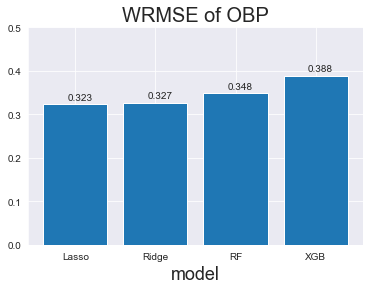

In [161]:
# 테스트 데이터셋(2018년)의 선수들의 OBP를 예측
Lasso_OBP = OBP_linear_models['Lasso'].predict(OBP_test.iloc[:,-5:])
Ridge_OBP = OBP_linear_models['Ridge'].predict(OBP_test.iloc[:,-5:])
RF_OBP = OBP_RF_models['RF'].predict(OBP_test.iloc[:,-5:])
XGB_OBP = XGB_OBP_gridsearch.predict(OBP_test.iloc[:,-5:])

# test 데이터의 WRMSE 계산
# 리스트로 만들기
wrmse_score = [wrmse(OBP_test['OBP'], OBP_test['AB'], Lasso_OBP),
               wrmse(OBP_test['OBP'], OBP_test['AB'], Ridge_OBP),
               wrmse(OBP_test['OBP'], OBP_test['AB'], RF_OBP),
               wrmse(OBP_test['OBP'], OBP_test['AB'], XGB_OBP)]

x_lab = ['Lasso', 'Ridge', 'RF', 'XGB']

plt.bar(x_lab, wrmse_score)
plt.title('WRMSE of OBP', fontsize=20)
plt.xlabel('model', fontsize=18)
plt.ylabel('', fontsize=18)
plt.ylim(0,0.5)

# 막대그래프 위에 값을 표시해준다.
for i, v in enumerate(wrmse_score):
    plt.text(i-0.1, v + 0.01, str(np.round(v,3))) # x 좌표, y 좌표, 텍스트를 표현한다.

plt.show()

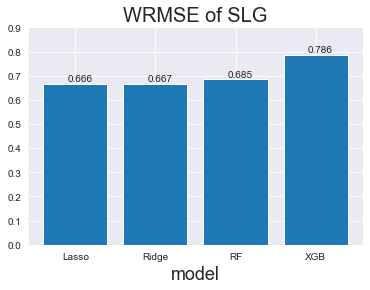

In [162]:
# 테스트 데이터셋(2018년)의 선수들의 SLG를 예측
Lasso_SLG = SLG_linear_models['Lasso'].predict(SLG_test.iloc[:,-5:])
Ridge_SLG = SLG_linear_models['Ridge'].predict(SLG_test.iloc[:,-5:])
RF_SLG = SLG_RF_models['RF'].predict(SLG_test.iloc[:,-5:])
XGB_SLG = XGB_SLG_gridsearch.predict(SLG_test.iloc[:,-5:])

# test데이터 WRMSE 계산
wrmse_score_SLG = [wrmse(SLG_test['SLG'], SLG_test['AB'], Lasso_SLG),
                   wrmse(SLG_test['SLG'], SLG_test['AB'], Ridge_SLG),
                   wrmse(SLG_test['SLG'], SLG_test['AB'], RF_SLG),
                   wrmse(SLG_test['SLG'], SLG_test['AB'], XGB_SLG)]

x_lab = ['Lasso', 'Ridge', 'RF', 'XGB']

plt.bar(x_lab, wrmse_score_SLG)
plt.title('WRMSE of SLG', fontsize=20)
plt.xlabel('model', fontsize=18)
plt.ylabel('', fontsize=18)
plt.ylim(0, 0.9)

# 막대그래프 위에 값을 표시해준다.
for i, v in enumerate(wrmse_score_SLG):
    plt.text(i-0.1, v + 0.01, str(np.round(v,3))) # x 좌표, y 좌표, 텍스트를 표현한다.
plt.show()

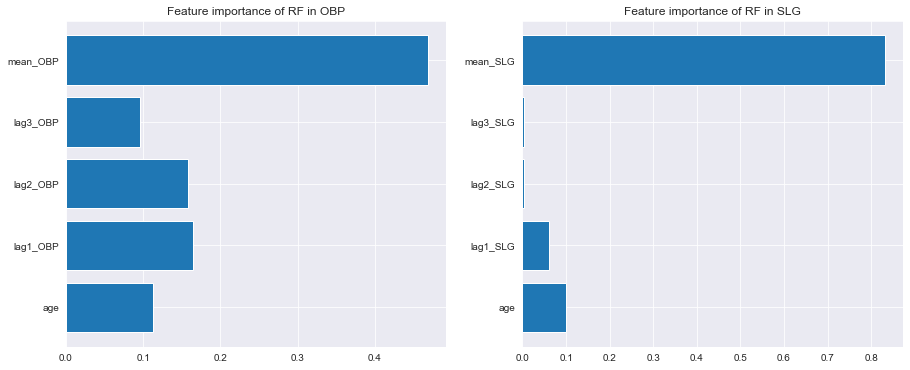

In [163]:
plt.figure(figsize=(15,6)) # 그래프의 크기 지정
plt.subplot(1,2,1) # 1행 2열의 첫번째(1,1) 그래프

#가로막대 그래프
plt.barh(OBP_train.iloc[:,-5:].columns,OBP_RF_models['RF'].feature_importances_)

plt.title('Feature importance of RF in OBP')
plt.subplot(1,2,2) # 1행 2열의 두번째(1,2) 그래프
plt.barh(SLG_train.iloc[:,-5:].columns,SLG_RF_models['RF'].feature_importances_)
plt.title('Feature importance of RF in SLG')
plt.show()

In [167]:
# Lasso에서 GridSearchCV로 탐색한 최적의 alpha값 출력
print('Alpha : ', OBP_linear_models['Lasso'].alpha)
# Lasso model의 선형 계수 값 출력
print(pd.DataFrame(OBP_linear_models['Lasso'].coef_.reshape(-1, 5),
                     columns=OBP_train.iloc[:,-5:].columns, index = ['coefficient']))

print('Alpha : ', SLG_linear_models['Lasso'].alpha)
print(pd.DataFrame(SLG_linear_models['Lasso'].coef_.reshape(-1, 5),
                     columns=SLG_train.iloc[:,-5:].columns, index = ['coefficient']))

Alpha :  0.0001
                  age  lag1_OBP  lag2_OBP  lag3_OBP  mean_OBP
coefficient  0.003195  0.018249       0.0       0.0  0.864913
Alpha :  0.0001
                age  lag1_SLG  lag2_SLG  lag3_SLG  mean_SLG
coefficient  0.0049  0.081209       0.0      -0.0  0.836453


..

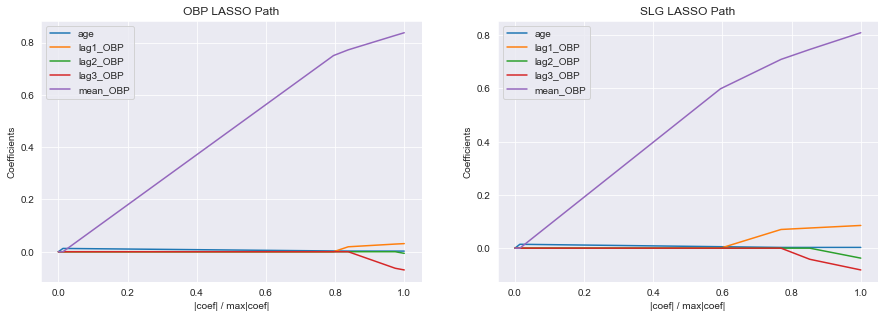

In [166]:
from sklearn.linear_model import lars_path
plt.figure(figsize=(15,4.8)) # 그래프 크기 지정
plt.subplot(1,2,1) # 1행 2열의 첫 번째(1행, 1열) 그래프

# OBP 모델의 alpha 값의 변화에 따른 계수의 변화를 alpha, coefs에 저장한다.
alphas, _, coefs = lars_path(OBP_train.iloc[:,-5:].values, OBP_train['OBP'],
                             method='lasso', verbose=True)

# 피처별 alpha 값에 따른 선형 모델 계수의 절댓값의 합
xx = np.sum(np.abs(coefs.T), axis=1)
# 계수의 절댓값 중 가장 큰 값으로 alpha에 따른 피처의 계수의 합을 나눈다.
xx /= xx[-1]

plt.plot(xx, coefs.T)
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('OBP LASSO Path')
plt.axis('tight')
plt.legend(OBP_train.iloc[:,-5:].columns)

plt.subplot(1,2,2) # 1행 2열의 두 번째(1행, 2열) 그래프
# SLG 모델에서 alpha 값의 변화에 따른 계수의 변화를 alpha, coefs에 저장한다.
alphas, _, coefs = lars_path(SLG_train.iloc[:,-5:].values, SLG_train['SLG'],
                             method='lasso', verbose=True)
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('SLG LASSO Path')
plt.axis('tight')
plt.legend(OBP_train.iloc[:,-5:].columns)
plt.show()